In [150]:
# Data 1-A

In [151]:
# Read the file for Data 1-A
import pandas as pd
import numpy as np
df = pd.read_csv('F:\\UpGrad\\GDP_Assignment\\DATA_1_A.csv')
pd.set_option('display.max_columns', 500)

In [152]:
#Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.
df = df[df.Duration != '2016-17']

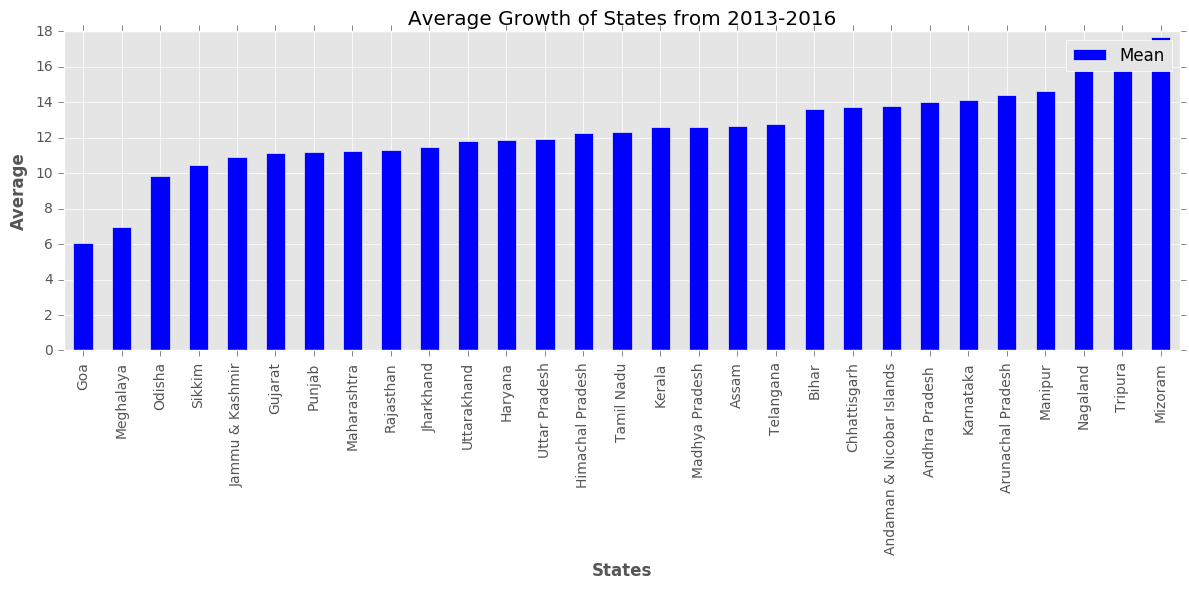

In [179]:
#Calculate the average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row 
#'(% Growth over previous year)'

import matplotlib.pyplot as plt
import seaborn as sns
#Filter columns acording to condition
temp_df = df[df.Duration.isin(('2013-14','2014-15','2015-16'))]
temp_df1 = temp_df[temp_df['Items  Description'] == ('(% Growth over previous year)')]
#Remove the UT's and West Bengal State
temp_df1 =  temp_df1.drop(['Delhi','Chandigarh','Puducherry','West Bengal1','All_India GDP']
                         ,axis = 1)

#Sort the values and set figure size
plt.figure(figsize=(12,6))
ax = temp_df1.mean().sort_values().plot(kind = 'bar',label = 'Mean',color = 'b')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.legend()
plt.title('Average Growth of States from 2013-2016')
plt.xlabel('States', fontweight='bold')
plt.ylabel('Average', fontweight='bold')
plt.tight_layout()
plt.show()

# from above graph MIZORAM is growing consistently fast while GOA is struggling
#The average growth rate of Uttar Pradesh is 11.94

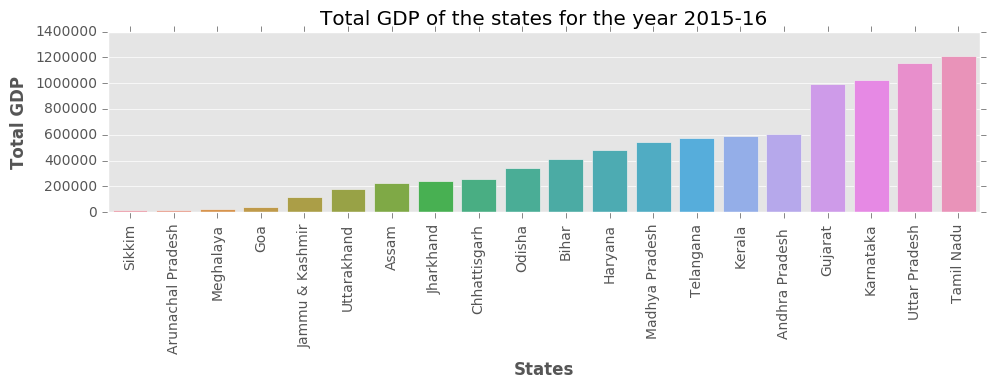

In [182]:
# Total GDP of the states for the year 2015-16
import seaborn as sns
GDP_States = df[df.Duration=='2015-16']
GDP_States =  GDP_States.drop(['Delhi','Chandigarh','Puducherry','West Bengal1','All_India GDP']
                         ,axis = 1)
GDP_States1 = GDP_States[GDP_States['Items  Description']==('GSDP - CURRENT PRICES (` in Crore)')]
#Remove columns having null values
GDP_States1 = GDP_States1.dropna(axis=1)
GDP_States1 = GDP_States1.transpose()
GDP_States1 = GDP_States1.iloc[2:]
GDP_States1.columns = ['GSDP_2015_16']
#Plot the graph
plt.figure(figsize=(10,4))
GDP_States1 = GDP_States1.sort_values(by='GSDP_2015_16', ascending=True,axis = 0)
ax = sns.barplot(data=GDP_States1.T)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.title('Total GDP of the states for the year 2015-16')
plt.xlabel('States', fontweight='bold')
plt.ylabel('Total GDP', fontweight='bold')
plt.tight_layout()
plt.show()
#Based on the below plot top 5 performing states are 1)Tamil Nadu 2)Uttar Pradesh 3)Karnataka 4)Gujrat 5)Andhra Pradesh  
#Based on the below plot bottom 5 performing states are 1) Sikkim 2)Arunachal Pradesh 3)Meghalaya 4)Goa 5)Jammu & Kashmir

# Part 1-B

In [179]:
#Plot GDP per capita for all the states

In [185]:
import pandas as pd
import glob
import os
import re
pd.set_option('display.max_columns', 500)
#Concatenating all the files
path = r'F:\UpGrad\GDP_Assignment\DATA_1_B'
all_files = glob.glob(path + "/*.csv")
li=[]
for filename in all_files:
    df = pd.read_csv(filename,index_col=None,header=0,encoding = "ISO-8859-1")
    li.append(df)
#Add a new column statename having name of state to which the data belongs
    statename = os.path.basename(filename)
    m = re.search('NAD-(.+?)-GSVA', statename)
    if m:
        name = m.group(1)
    df['State'] = name
df = pd.concat(li,axis=0,ignore_index=True)
print(df)

         2011-12     2012-13     2013-14      2014-15      2015-16  2016-17  \
0        59737.0     61996.0     72389.0      76670.0          NaN      NaN   
1        26565.0     26839.0     31653.0      34026.0          NaN      NaN   
2        13673.0     15165.0     19074.0      19560.0          NaN      NaN   
3         4044.0      3903.0      4560.0       4634.0          NaN      NaN   
4        15456.0     16089.0     17102.0      18451.0          NaN      NaN   
5         2867.0      3901.0      6220.0      18738.0          NaN      NaN   
6        62604.0     65897.0     78609.0      95409.0          NaN      NaN   
7         6334.0      6450.0      6684.0       6650.0          NaN      NaN   
8        15924.0     17167.0     30928.0      30607.0          NaN      NaN   
9        53695.0     60319.0     68031.0      69302.0          NaN      NaN   
10       75953.0     83936.0    105643.0     106559.0          NaN      NaN   
11       33937.0     41707.0     51311.0      56278.

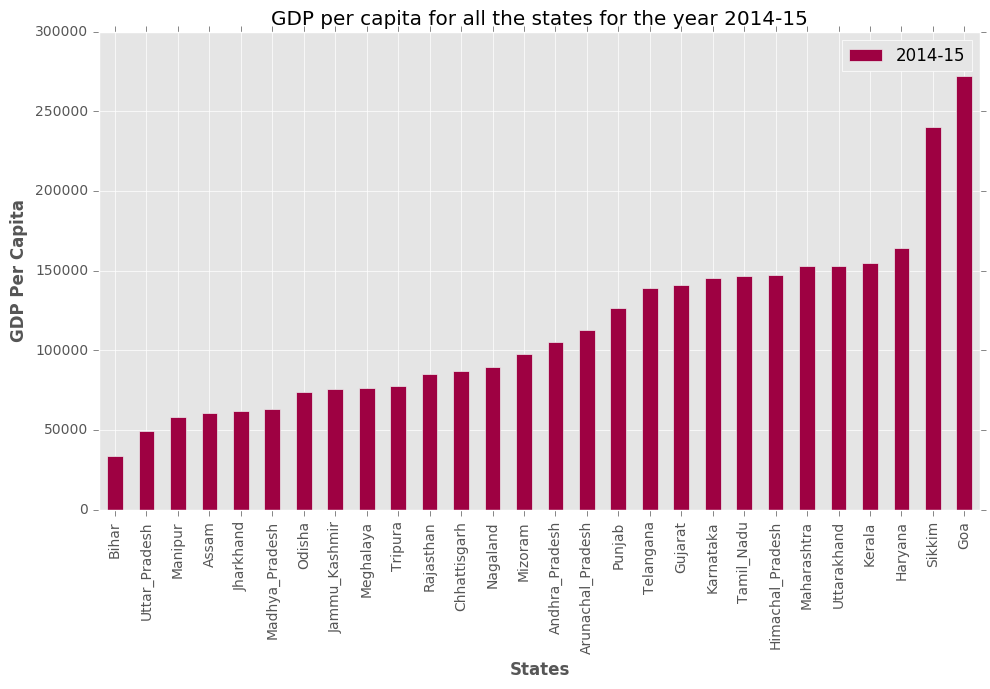

In [199]:
#Calculate GDP per capita for all the states
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
df_States =  df[~df.State.isin(['Delhi','Chandigarh','Andaman_Nicobar_Islands','Puducherry'])]
GSDP_Item = df_States[df_States.Item==('Per Capita GSDP (Rs.)')]
GSDP_Item = GSDP_Item[['2014-15','State']]
# color = ["#31A354"]
ax = GSDP_Item.sort_values(by='2014-15').plot.bar(x='State',y='2014-15',stacked=True, figsize=(10,7), cmap='Spectral')
plt.title('GDP per capita for all the states for the year 2014-15')
plt.xlabel('States', fontweight='bold')
plt.ylabel('GDP Per Capita', fontweight='bold')
plt.tight_layout()
plt.show()

# From the below graph top 5 GDP's are 1) Goa 2) Sikkim 3) Haryana 4) Kerela 5) Uttrakhand
# Bottom 5 GDP's are 1) Bihar 2) Uttar Pradesh 3) Manipur 4) Assam 5) Jharkhand
# Ratio of Highest per capita to lowest per capita is 271793 : 33954 

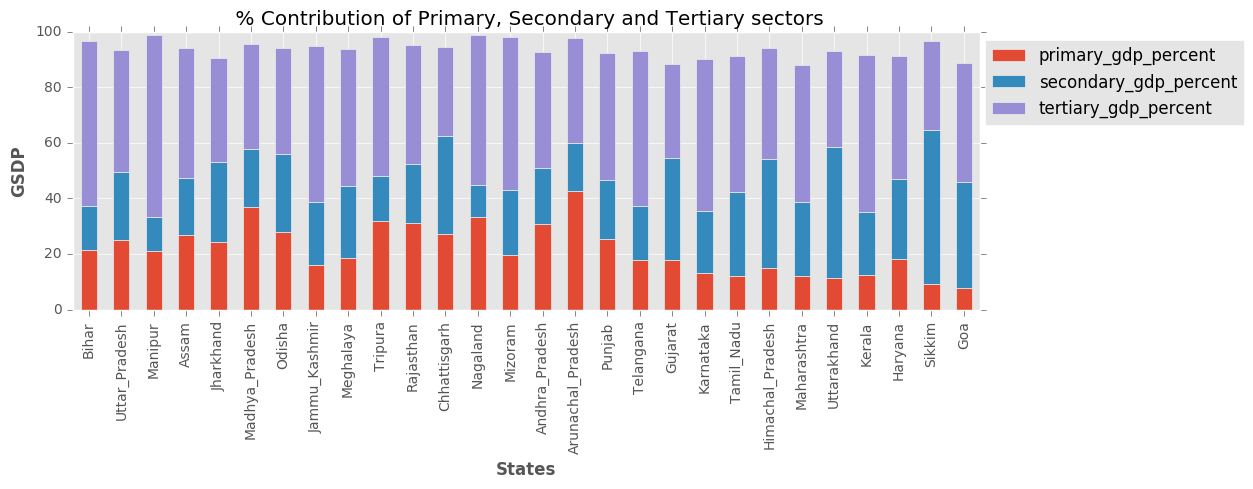

In [237]:
#percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states
df_Sectors = df_States.pivot(index = 'State',columns = 'Item',values= '2014-15')
df_Sectors_PST = df_Sectors.sort_values(by = 'Per Capita GSDP (Rs.)')
df_Sectors_PST['primary_gdp_percent']  = df_Sectors_PST['Primary']/df_Sectors_PST['Gross State Domestic Product'] *100
df_Sectors_PST['secondary_gdp_percent']  = df_Sectors_PST['Secondary']/df_Sectors_PST['Gross State Domestic Product'] *100
df_Sectors_PST['tertiary_gdp_percent']  = df_Sectors_PST['Tertiary']/df_Sectors_PST['Gross State Domestic Product'] * 100
df_Sectors_PST = df_Sectors_PST[['primary_gdp_percent','secondary_gdp_percent','tertiary_gdp_percent']]
df_Sectors_PST.plot(kind = 'bar',stacked=True, figsize=(10,5)).legend(bbox_to_anchor=(1.3, 1))
plt.title(' % Contribution of Primary, Secondary and Tertiary sectors')
plt.xlabel('States', fontweight='bold')
plt.ylabel('GSDP', fontweight='bold')
plt.tight_layout()
plt.show()

In [238]:
#Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, 
#where C1 would have the highest per capita GDP and C4, the lowest)
df_Sectors['Per Capita GSDP (Rs.)'].quantile([.20,.50,.85,1])
df_Sectors.loc[(df_Sectors['Per Capita GSDP (Rs.)']>153064.85) & (df_Sectors['Per Capita GSDP (Rs.)']<=271793.00),'Tag'] = 'C1'
df_Sectors.loc[(df_Sectors['Per Capita GSDP (Rs.)']>101332.00) & (df_Sectors['Per Capita GSDP (Rs.)']<=153064.85),'Tag'] = 'C2' 
df_Sectors.loc[(df_Sectors['Per Capita GSDP (Rs.)']>67385.00) & (df_Sectors['Per Capita GSDP (Rs.)']<=101332.00),'Tag'] = 'C3'
df_Sectors.loc[(df_Sectors['Per Capita GSDP (Rs.)']<67385.00),'Tag'] ='C4'
df_Sectors

Item,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,Hotels & restaurants,Livestock,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Population ('00),Primary,Public administration,Railways,"Real estate, ownership of dwelling & professional services",Road transport,Road transport*,Road transport**,Secondary,Services incidental to transport,Services incidental to transport*,Storage,Subsidies on products,TOTAL GSVA at basic prices,Taxes on Products,Tertiary,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport,Tag
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Andhra_Pradesh,14819416.0,14900.0,928756.0,4664889.0,7893514.0,1151729.0,1900863.0,2270664.0,346160.0,52646842.0,517400.0,4309078.0,4672266.0,1484300.0,4215389.0,104977.0,501510.0,16303716.0,2200897.0,424228.0,4405409.0,2816000.0,NaN,NaN,10488884.0,780200.0,NaN,18700.0,1690800.0,48825542.0,5512100.00,22032942.0,3716000.0,NaN,4233400.0,5076984.0,94200.0,C2
Arunachal_Pradesh,686117.0,0.0,19568.0,147842.0,415520.0,113527.0,25207.0,8193.0,224017.0,1676119.0,3625.0,38387.0,26120.0,30842.0,218728.0,112718.0,14870.0,716959.0,243867.0,59.0,48418.0,15467.0,NaN,NaN,287489.0,109.0,NaN,0.0,30272.0,1636292.0,70099.00,631844.0,56796.0,NaN,60421.0,35203.0,0.0,C2
Assam,3855548.0,26223.0,357619.0,1733568.0,2890544.0,296587.0,543651.0,529539.0,261987.0,19809800.0,110904.0,173478.0,2002936.0,1471149.0,1795658.0,60621.0,326780.0,5326697.0,1373611.0,252509.0,1412466.0,507668.0,NaN,NaN,4033091.0,35739.0,NaN,10308.0,582406.0,18666897.0,1725309.00,9307109.0,2876251.0,NaN,2987155.0,1194568.0,4502.0,C4
Bihar,7951890.0,13599.0,919427.0,3449763.0,4688237.0,345168.0,1178022.0,653224.0,550132.0,37391988.0,366982.0,2060296.0,2189965.0,68107.0,4587589.0,33954.0,1101240.0,8019997.0,2078171.0,462413.0,3740641.0,1572288.0,NaN,NaN,5984896.0,166600.0,NaN,10618.0,2006421.0,36184863.0,3213546.00,22179969.0,7081391.0,NaN,7448373.0,3147173.0,2228.0,C4
Chhattisgarh,3948847.0,9507.0,294552.0,2669855.0,2613371.0,1198438.0,739057.0,385483.0,597785.0,23498180.0,121407.0,352208.0,4370593.0,2451970.0,1112232.0,86860.0,270530.0,6400817.0,867982.0,159176.0,2462166.0,386628.0,NaN,NaN,8238886.0,5232.0,NaN,16675.0,1332092.0,22228481.0,2601791.00,7588778.0,1414164.0,NaN,1535571.0,871770.0,0.0,C3
Goa,308507.0,46359.0,44028.0,165819.0,140421.0,204110.0,233618.0,122201.0,15744.0,4063307.0,37434.0,30141.0,1177608.0,3622.0,180431.0,271793.0,14950.0,312129.0,346486.0,15649.0,407099.0,46171.0,NaN,NaN,1547536.0,19272.0,NaN,357.0,61854.0,3597882.0,527279.00,1738217.0,343492.0,NaN,380927.0,189656.0,17820.0,C1
Gujarat,13769969.0,NaN,1242520.0,5526017.0,9671086.0,3409983.0,4606644.0,638357.0,761616.0,89502727.0,NaN,2698910.0,24087538.0,2117218.0,3123413.0,141263.0,633590.0,15887187.0,2576195.0,511593.0,5179502.0,NaN,NaN,NaN,33023538.0,NaN,2744163.0,57634.0,1981546.0,79131102.0,12353171.04,30220377.0,10178713.0,NaN,10178713.0,4555910.0,NaN,C2
Haryana,8015238.0,NaN,479658.0,3702571.0,4636731.0,1101919.0,1671486.0,110080.0,352254.0,43746207.0,168535.0,2916173.0,7756921.0,25186.0,2001581.0,164077.0,266620.0,8040424.0,1036377.0,423873.0,6970183.0,1452364.0,NaN,NaN,12561411.0,190269.0,NaN,14459.0,1067867.0,39828404.0,4985670.00,19226568.0,4817784.0,NaN,4986319.0,2560623.0,NaN,C1
Himachal_Pradesh,1514981.0,3979.0,194266.0,808256.0,853758.0,767268.0,362521.0,9968.0,540950.0,10436879.0,121333.0,110304.0,2543637.0,33385.0,923164.0,147330.0,70840.0,1548366.0,553974.0,2528.0,1125937.0,349608.0,NaN,NaN,4119162.0,1724.0,NaN,129.0,259291.0,9800853.0,895317.00,4133326.0,494162.0,NaN,615496.0,552234.0,0.0,C2


In [239]:
#Drop extra Columns sectors and sub-sub-sectors
df_Sectors = df_Sectors.drop(['Primary','Secondary','Tertiary','Crops','Livestock','Forestry and logging',
                                      'Fishing and aquaculture','Trade & repair services','Hotels & restaurants',
                                      'Railways','Road transport','Water transport','Air transport',
                                      'Services incidental to transport','Storage','Communication & services related to broadcasting',
                                      'TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products',
                                      "Population ('00)"],axis = 1)
df_Sectors.head()

Item,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Gross State Domestic Product,Manufacturing,Mining and quarrying,Other services,Per Capita GSDP (Rs.),Public administration,"Real estate, ownership of dwelling & professional services",Road transport*,Road transport**,Services incidental to transport*,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Tag
State,,,,,,,,,,,,,,,,,,
Andhra_Pradesh,14819416.0,4664889.0,1151729.0,1900863.0,52646842.0,4672266.0,1484300.0,4215389.0,104977.0,2200897.0,4405409.0,NaN,NaN,NaN,NaN,4233400.0,5076984.0,C2
Arunachal_Pradesh,686117.0,147842.0,113527.0,25207.0,1676119.0,26120.0,30842.0,218728.0,112718.0,243867.0,48418.0,NaN,NaN,NaN,NaN,60421.0,35203.0,C2
Assam,3855548.0,1733568.0,296587.0,543651.0,19809800.0,2002936.0,1471149.0,1795658.0,60621.0,1373611.0,1412466.0,NaN,NaN,NaN,NaN,2987155.0,1194568.0,C4
Bihar,7951890.0,3449763.0,345168.0,1178022.0,37391988.0,2189965.0,68107.0,4587589.0,33954.0,2078171.0,3740641.0,NaN,NaN,NaN,NaN,7448373.0,3147173.0,C4
Chhattisgarh,3948847.0,2669855.0,1198438.0,739057.0,23498180.0,4370593.0,2451970.0,1112232.0,86860.0,867982.0,2462166.0,NaN,NaN,NaN,NaN,1535571.0,871770.0,C3


In [240]:
#Transform the data to find total, % Contribution, Cumulative Sum of sub-sector C1
df_Sectors = df_Sectors.replace('Nan',0.0)
df_Sectors_C1 = df_Sectors.loc[df_Sectors['Tag']=='C1',]
Total_GSDP_for_C1 = df_Sectors_C1['Gross State Domestic Product'].sum()
df_Sectors_T_C1 = df_Sectors_C1.transpose()
df_Sectors_T_C1['Total_Sub_Sector'] = df_Sectors_T_C1.sum(axis = 1,skipna = True)
df_Sectors_T_C1.iloc[-1, df_Sectors_T_C1.columns.get_loc('Total_Sub_Sector')] = 0.0
df_Sectors_T_C1['% Contribution'] = df_Sectors_T_C1['Total_Sub_Sector'].apply(lambda x : (x/Total_GSDP_for_C1)*100)
df_Sectors_T_C1 = df_Sectors_T_C1.sort_values(by = '% Contribution', ascending = False)
df_Sectors_T_C1 = df_Sectors_T_C1.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)'])
df_Sectors_T_C1['Cumulative Sum'] = df_Sectors_T_C1['% Contribution'].cumsum()
df_Sectors_T_C1


State,Goa,Haryana,Kerala,Sikkim,Uttarakhand,Total_Sub_Sector,% Contribution,Cumulative Sum
Item,,,,,,,,
Manufacturing,1.17761e+06,7.75692e+06,4.27357e+06,550697,5.86625e+06,1.9625e+07,16.613203,16.613203
"Agriculture, forestry and fishing",308507,8.01524e+06,5.93062e+06,137447,1.60142e+06,1.59932e+07,13.538762,30.151965
"Trade, repair, hotels and restaurants",380927,4.98632e+06,8.55734e+06,70568,1.74311e+06,1.57383e+07,13.322925,43.474890
"Real estate, ownership of dwelling & professional services",407099,6.97018e+06,7.28763e+06,75330,831307,1.55716e+07,13.181797,56.656687
Construction,165819,3.70257e+06,7.314e+06,82058,1.34273e+06,1.26072e+07,10.672368,67.329055
Other services,180431,2.00158e+06,5.72864e+06,149265,982430,9.04235e+06,7.654629,74.983684
"Transport, storage, communication & services related to broadcasting",189656,2.56062e+06,4.02093e+06,47347,1.06669e+06,7.88525e+06,6.675109,81.658792
Trade & repair services*,0,0,7.76385e+06,0,0,7.76385e+06,6.572335,88.231127
Financial services,233618,1.67149e+06,2.01031e+06,21079,385030,4.32152e+06,3.658299,91.889426


In [241]:
#Transform the data to find total, % Contribution, Cumulative Sum of sub-sector C2
df_Sectors_C2 = df_Sectors.loc[df_Sectors['Tag']=='C2',]
Total_GSDP_for_C2 = df_Sectors_C2['Gross State Domestic Product'].sum()
df_Sectors_T_C2 = df_Sectors_C2.transpose()
df_Sectors_T_C2['Total_Sub_Sector'] = df_Sectors_T_C2.sum(axis = 1,skipna = True)
df_Sectors_T_C2.iloc[-1, df_Sectors_T_C2.columns.get_loc('Total_Sub_Sector')] = 0.0
df_Sectors_T_C2['% Contribution'] = df_Sectors_T_C2['Total_Sub_Sector'].apply(lambda x : (x/Total_GSDP_for_C2)*100)
df_Sectors_T_C2 = df_Sectors_T_C2.sort_values(by = '% Contribution', ascending = False)
df_Sectors_T_C2 = df_Sectors_T_C2.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)'])
df_Sectors_T_C2['Cumulative Sum'] = df_Sectors_T_C2['% Contribution'].cumsum()
df_Sectors_T_C2

State,Andhra_Pradesh,Arunachal_Pradesh,Gujarat,Himachal_Pradesh,Karnataka,Maharashtra,Punjab,Tamil_Nadu,Telangana,Total_Sub_Sector,% Contribution,Cumulative Sum
Item,,,,,,,,,,,,
Manufacturing,4.67227e+06,26120,2.40875e+07,2.54364e+06,1.29538e+07,3.36603e+07,4.79034e+06,1.89148e+07,6.35371e+06,1.08003e+08,17.340648,17.340648
"Real estate, ownership of dwelling & professional services",4.40541e+06,48418,5.1795e+06,1.12594e+06,2.47664e+07,3.07181e+07,3.14279e+06,1.68302e+07,9.47884e+06,9.56955e+07,15.364664,32.705312
"Agriculture, forestry and fishing",1.48194e+07,686117,1.377e+07,1.51498e+06,1.12194e+07,1.64757e+07,9.28572e+06,1.30642e+07,7.5915e+06,8.8427e+07,14.197645,46.902957
"Trade, repair, hotels and restaurants",4.2334e+06,60421,1.01787e+07,615496,8.99166e+06,1.58391e+07,4.41992e+06,1.28958e+07,6.49461e+06,6.37292e+07,10.232211,57.135168
Construction,4.66489e+06,147842,5.52602e+06,808256,6.1048e+06,9.45021e+06,2.20296e+06,1.22167e+07,2.85402e+06,4.39757e+07,7.060643,64.195812
Other services,4.21539e+06,218728,3.12341e+06,923164,5.30817e+06,1.08064e+07,3.30304e+06,7.43012e+06,4.15823e+06,3.94866e+07,6.339883,70.535695
Financial services,1.90086e+06,25207,4.60664e+06,362521,4.09417e+06,1.61433e+07,2.05752e+06,5.5985e+06,3.02373e+06,3.78125e+07,6.071087,76.606782
"Transport, storage, communication & services related to broadcasting",5.07698e+06,35203,4.55591e+06,552234,5.09765e+06,9.69725e+06,1.95181e+06,7.18832e+06,3.60474e+06,3.77601e+07,6.062677,82.669459
Public administration,2.2009e+06,243867,2.5762e+06,553974,2.23258e+06,5.42699e+06,1.84273e+06,3.4008e+06,1.71126e+06,2.01893e+07,3.241550,85.911009


In [242]:
#Transform the data to find total, % Contribution, Cumulative Sum of sub-sector C3
df_Sectors_C3 = df_Sectors.loc[df_Sectors['Tag']=='C3',]
Total_GSDP_for_C3 = df_Sectors_C3['Gross State Domestic Product'].sum()
df_Sectors_T_C3 = df_Sectors_C3.transpose()
df_Sectors_T_C3['Total_Sub_Sector'] = df_Sectors_T_C3.sum(axis = 1,skipna = True)
df_Sectors_T_C3.iloc[-1, df_Sectors_T_C3.columns.get_loc('Total_Sub_Sector')] = 0.0
df_Sectors_T_C3['% Contribution'] = df_Sectors_T_C3['Total_Sub_Sector'].apply(lambda x : (x/Total_GSDP_for_C3)*100)
df_Sectors_T_C3 = df_Sectors_T_C3.sort_values(by = '% Contribution', ascending = False)
df_Sectors_T_C3 = df_Sectors_T_C3.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)'])
df_Sectors_T_C3['Cumulative Sum'] = df_Sectors_T_C3['% Contribution'].cumsum()
df_Sectors_T_C3

State,Chhattisgarh,Jammu_Kashmir,Meghalaya,Mizoram,Nagaland,Odisha,Rajasthan,Tripura,Total_Sub_Sector,% Contribution,Cumulative Sum
Item,,,,,,,,,,,
"Agriculture, forestry and fishing",3.94885e+06,1.58670e+06,366521,217010,607897,6.42298e+06,1.50444e+07,799825,2.89942e+07,21.420049,21.420049
Manufacturing,4.37059e+06,893207,433213,8479,18346,5.75423e+06,6.55258e+06,228625,1.82593e+07,13.489416,34.909465
"Trade, repair, hotels and restaurants",1.53557e+06,889931,383974,114315,140781,3.14956e+06,7.29729e+06,390423,1.39018e+07,10.270273,45.179738
"Real estate, ownership of dwelling & professional services",2.46217e+06,1.34008e+06,150409,55068,159651,2.34871e+06,6.452e+06,190704,1.31588e+07,9.721330,54.901067
Construction,2.66986e+06,785503,150256,133228,156072,2.4024e+06,5.35333e+06,177899,1.18285e+07,8.738575,63.639643
Other services,1.11223e+06,946826,214211,186222,259186,2.3406e+06,4.16429e+06,323287,9.54685e+06,7.052936,70.692579
Mining and quarrying,2.45197e+06,33621,84529,8588,8280,2.58633e+06,4.06938e+06,142391,9.38509e+06,6.933431,77.626011
"Transport, storage, communication & services related to broadcasting",871770,712552,148189,52587,77521,2.03402e+06,3.81446e+06,155956,7.86705e+06,5.811948,83.437958
Public administration,867982,1.34988e+06,239782,206259,295424,1.31822e+06,2.46036e+06,338244,7.07616e+06,5.227657,88.665615


In [243]:
#Transform the data to find total, % Contribution, Cumulative Sum of sub-sector C4
df_Sectors_C4 = df_Sectors.loc[df_Sectors['Tag']=='C4',]
Total_GSDP_for_C4 = df_Sectors_C4['Gross State Domestic Product'].sum()
df_Sectors_T_C4 = df_Sectors_C4.transpose()
df_Sectors_T_C4['Total_Sub_Sector'] = df_Sectors_T_C4.sum(axis = 1,skipna = True)
df_Sectors_T_C4.iloc[-1, df_Sectors_T_C4.columns.get_loc('Total_Sub_Sector')] = 0.0
df_Sectors_T_C4['% Contribution'] = df_Sectors_T_C4['Total_Sub_Sector'].apply(lambda x : (x/Total_GSDP_for_C4)*100)
df_Sectors_T_C4 = df_Sectors_T_C4.sort_values(by = '% Contribution', ascending = False)
df_Sectors_T_C4 = df_Sectors_T_C4.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)'])
df_Sectors_T_C4['Cumulative Sum'] = df_Sectors_T_C4['% Contribution'].cumsum()
df_Sectors_T_C4

State,Assam,Bihar,Jharkhand,Madhya_Pradesh,Manipur,Uttar_Pradesh,Total_Sub_Sector,% Contribution,Cumulative Sum
Item,,,,,,,,,
"Agriculture, forestry and fishing",3.85555e+06,7.95189e+06,3.21106e+06,1.62356e+07,383140,2.50978e+07,5.6735e+07,24.323490,24.323490
"Trade, repair, hotels and restaurants",2.98716e+06,7.44837e+06,1.99136e+06,5.35752e+06,262950,9.43724e+06,2.74846e+07,11.783216,36.106707
Manufacturing,2.00294e+06,2.18996e+06,4.11415e+06,4.36883e+06,49501,1.22616e+07,2.4987e+07,10.712459,46.819166
"Real estate, ownership of dwelling & professional services",1.41247e+06,3.74064e+06,1.65678e+06,2.66012e+06,159335,1.45482e+07,2.41775e+07,10.365410,57.184576
Construction,1.73357e+06,3.44976e+06,1.78983e+06,4.40315e+06,143182,1.12564e+07,2.27759e+07,9.764521,66.949097
"Transport, storage, communication & services related to broadcasting",1.19457e+06,3.14717e+06,1.47002e+06,2.8658e+06,109726,7.40451e+06,1.61918e+07,6.941761,73.890858
Other services,1.79566e+06,4.58759e+06,1.37541e+06,2.74780e+06,317930,5.03462e+06,1.5859e+07,6.799089,80.689947
Public administration,1.37361e+06,2.07817e+06,1.08832e+06,2.49732e+06,297078,6.15212e+06,1.34866e+07,5.781998,86.471945
Financial services,543651,1.17802e+06,551441,1.98879e+06,30315,3.39228e+06,7.6845e+06,3.294504,89.766449


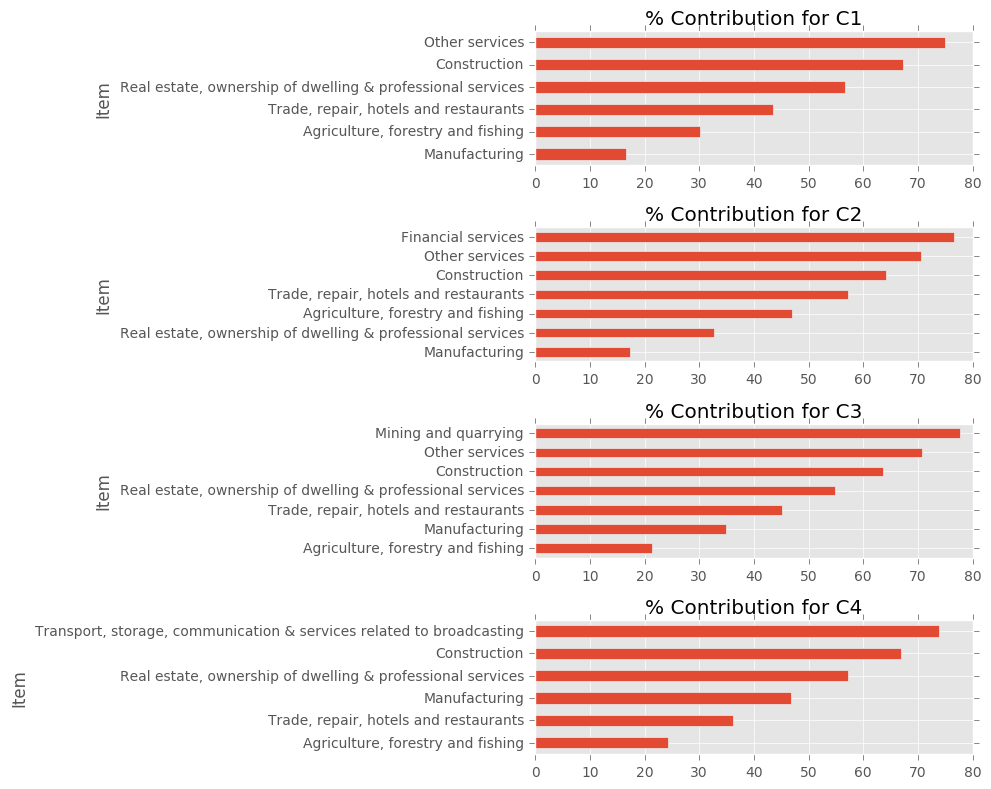

In [244]:
#Plot the contribution of the sub-sectors as a percentage of the GSDP of each category
plt.figure(figsize=(10,8))

plt.subplot(4,1,1)
plt.title('% Contribution for C1')
df_Sectors_T_C1 = df_Sectors_T_C1.loc[(df_Sectors_T_C1['Cumulative Sum']<=80)]
df_Sectors_T_C1['Cumulative Sum'].plot(kind = 'barh')


plt.subplot(4,1,2)

plt.title('% Contribution for C2')
df_Sectors_T_C2 = df_Sectors_T_C2.loc[(df_Sectors_T_C2['Cumulative Sum']<=80)]
df_Sectors_T_C2['Cumulative Sum'].plot(kind = 'barh')

plt.subplot(4,1,3)
plt.title('% Contribution for C3')
df_Sectors_T_C3 = df_Sectors_T_C3.loc[(df_Sectors_T_C3['Cumulative Sum']<=80)]
df_Sectors_T_C3['Cumulative Sum'].plot(kind = 'barh')

plt.subplot(4,1,4)
plt.title('% Contribution for C4')
df_Sectors_T_C4 = df_Sectors_T_C4.loc[(df_Sectors_T_C4['Cumulative Sum']<=80)]
df_Sectors_T_C4['Cumulative Sum'].plot(kind = 'barh')

plt.tight_layout()

# Part 2

In [228]:
import pandas as pd
import numpy as np
df_Part_2 = pd.read_csv('F:\\UpGrad\\GDP_Assignment\\DATA_2.csv')
pd.set_option('display.max_columns', 500)
#data from part 1-B
df_Part_1_B = df_States[['State','2014-15','Item']]
df_Part_1_B = df_Part_1_B[df_Part_1_B.Item==('Per Capita GSDP (Rs.)')]
df_Part_1_B =  df_Part_1_B.drop(['Item'],axis = 1)
#Data from part 2
df_Part_2 = df_Part_2[['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]
df_Part_2['Level of Education - State'] = df_Part_2['Level of Education - State'].str.strip().str.replace(' ', '_')
df_Part_2['Level of Education - State'] =  df_Part_2['Level of Education - State'].replace(to_replace ='A_&_N_Islands' ,
                                                                                           value = 'Andaman_Nicobar_Islands')
df_Part_2['Primary - 2014-2015'] = df_Part_2['Primary - 2014-2015'].replace('Nan',0.0)
df_Part_2.rename(columns = {'Level of Education - State' : 'State'},inplace=True)
# df_Part_1_B.columns = range(df_Part_1_B.shape[1])
df_Part_1_B.rename(columns = {'2014-15' : 'Per Capita GSDP (Rs.)'},inplace=True)
df_2 = df_Part_1_B.merge(df_Part_2, on="State",how="right")
df_corr = df_2.corr()
df_corr

,Per Capita GSDP (Rs.),Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
Per Capita GSDP (Rs.),1.000000,-0.486898,-0.524320,-0.446081
Primary - 2014-2015,-0.486898,1.000000,0.523026,0.185113
Upper Primary - 2014-2015,-0.524320,0.523026,1.000000,0.527288
Secondary - 2014-2015,-0.446081,0.185113,0.527288,1.000000


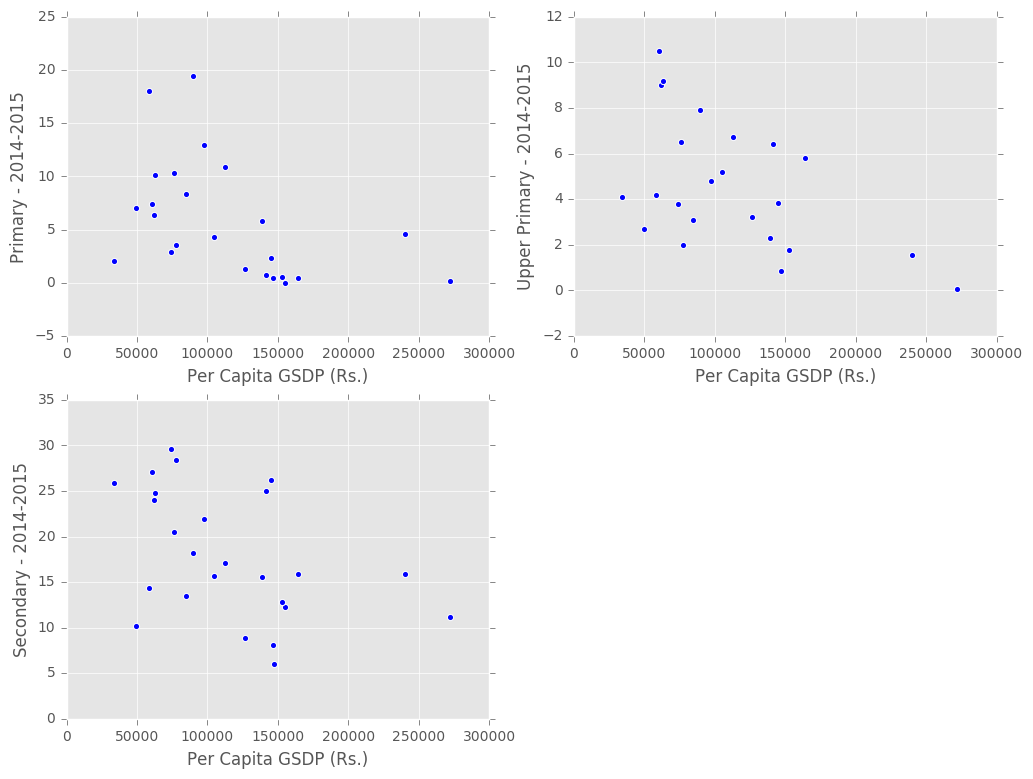

In [245]:
plt.figure(figsize=(12,14))

plt.subplot(3,2,1)
sns.scatterplot(x = 'Per Capita GSDP (Rs.)',y = 'Primary - 2014-2015', data =df_2 )

plt.subplot(3,2,2)
sns.scatterplot(x = 'Per Capita GSDP (Rs.)',y = 'Upper Primary - 2014-2015', data =df_2 )

plt.subplot(3,2,3)
sns.scatterplot(x = 'Per Capita GSDP (Rs.)',y = 'Secondary - 2014-2015', data =df_2 )
